In [ ]:
import sys
import os
sys.path.append(os.getcwd())

In [3]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Import our custom modules
from models.mnist_autoencoder import MNISTAutoencoder
from trainers.autoencoder_trainer import AutoencoderTrainer

In [4]:
print(torch.cuda.is_available())

True


In [ ]:
import importlib
import models.mnist_autoencoder  
importlib.reload(models.mnist_autoencoder)  

from models.mnist_autoencoder import Autoencoder

In [ ]:

config = {
    'batch_size': 128,
    'lr': 1e-3,
    'num_epochs': 20,
    'latent_dim': 128,
    'encoder_channels': [32, 64],
    'kernel_sizes': [3, 3],
    'strides': [2, 2],
    'paddings': [1, 1],
    'device': 'cuda'
}

transform = transforms.Compose([
    transforms.ToTensor(),
])

data_path = "/datasets/cv_datasets/data"
train_dataset = datasets.MNIST(root=data_path, train=True, download=False, transform=transform)
val_dataset   = datasets.MNIST(root=data_path, train=False, download=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=config['batch_size'], shuffle=False)

In [8]:
sample_batch, _ = next(iter(train_loader))  

input_shape = sample_batch.shape  

print(f"Input shape: {input_shape}") 


Input shape: torch.Size([128, 1, 28, 28])


In [12]:
for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break


Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])


In [ ]:
model = Autoencoder(
    input_shape=input_shape,
    channels=config['encoder_channels'],
    kernel_sizes=config['kernel_sizes'],
    strides=config['strides'],
    paddings=config['paddings'],
    latent_dim=config['latent_dim'],
    output_channels=input_shape[0]  
)

print(model)

Autoencoder(
  (encoder): Encoder(
    (conv): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
    (fc): Linear(in_features=3136, out_features=128, bias=True)
  )
  (decoder): Decoder(
    (fc): Linear(in_features=128, out_features=3136, bias=True)
    (deconv): Sequential(
      (0): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): ConvTranspose2d(32, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    )
    (out_activation): Sigmoid()
  )
)


In [13]:
dummy_input = torch.randn(1, 1, 28, 28)  # Random input to simulate a 1x28x28 image

# Send the input through the model
reconstruction, latent = model(dummy_input)

# Print the shapes of the outputs
print("Input Shape:", dummy_input.shape)
print("Latent Shape:", latent.shape)  # Shape of the latent vector
print("Reconstructed Shape:", reconstruction.shape)  # Shape of the reconstructed image

Input Shape: torch.Size([1, 1, 28, 28])
Latent Shape: torch.Size([1, 128])
Reconstructed Shape: torch.Size([1, 1, 28, 28])


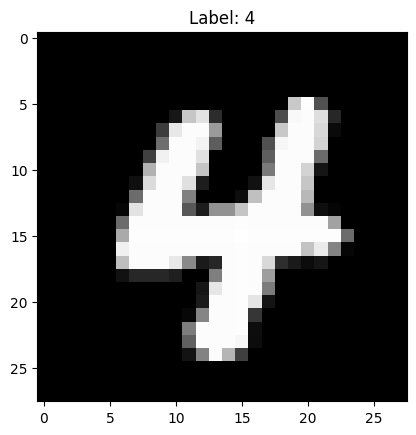

In [14]:
# Get a single batch
images, labels = next(iter(train_loader))

# Extract a single image
single_image = images[0]  # Shape: (C, H, W)
single_label = labels[0]  # Corresponding label

# Display the image
import matplotlib.pyplot as plt
plt.imshow(single_image.squeeze(0), cmap="gray")  # Squeeze if grayscale
plt.title(f"Label: {single_label.item()}")
plt.show()

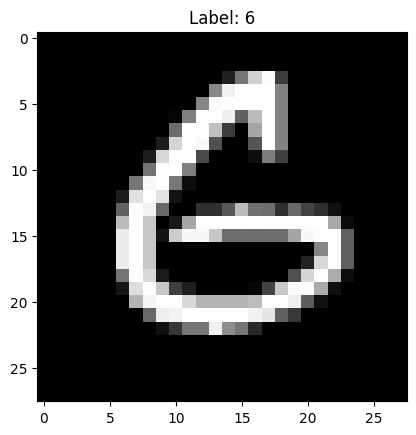

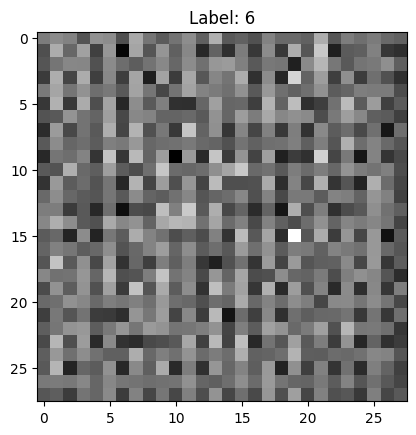

In [15]:
# Get a single batch
images, labels = next(iter(train_loader))

# Extract a single image
single_image = images[0]  # Shape: (C, H, W)
single_label = labels[0]  # Corresponding label

# Display the image
import matplotlib.pyplot as plt
plt.imshow(single_image.squeeze(0), cmap="gray")  # Squeeze if grayscale
plt.title(f"Label: {single_label.item()}")
plt.show()
single_image = single_image.unsqueeze(0)
with torch.no_grad():
    reconstruction, latent = model(single_image)  # Unsqueeze to add a batch dimension
    reconstruction = reconstruction.squeeze(0).squeeze(0)
    plt.imshow(reconstruction, cmap="gray")  # Squeeze if grayscale
    plt.title(f"Label: {single_label.item()}")
    plt.show()

In [16]:
# Initialize the trainer with the model and data loaders
trainer = Trainer(
    model,
    train_loader,
    val_loader,
    device=config['device'],
    lr=config['lr'],
    num_epochs=config['num_epochs']
)

# Start training; training logs will be printed in the output
trainer.train()

Epoch 1/20 - Train Loss: 0.0227 - Val Loss: 0.0048
Epoch 2/20 - Train Loss: 0.0037 - Val Loss: 0.0029
Epoch 3/20 - Train Loss: 0.0026 - Val Loss: 0.0022
Epoch 4/20 - Train Loss: 0.0021 - Val Loss: 0.0019
Epoch 5/20 - Train Loss: 0.0018 - Val Loss: 0.0017
Epoch 6/20 - Train Loss: 0.0016 - Val Loss: 0.0015
Epoch 7/20 - Train Loss: 0.0014 - Val Loss: 0.0014
Epoch 8/20 - Train Loss: 0.0013 - Val Loss: 0.0013
Epoch 9/20 - Train Loss: 0.0013 - Val Loss: 0.0012
Epoch 10/20 - Train Loss: 0.0012 - Val Loss: 0.0012
Epoch 11/20 - Train Loss: 0.0011 - Val Loss: 0.0011
Epoch 12/20 - Train Loss: 0.0011 - Val Loss: 0.0011
Epoch 13/20 - Train Loss: 0.0010 - Val Loss: 0.0011
Epoch 14/20 - Train Loss: 0.0010 - Val Loss: 0.0010
Epoch 15/20 - Train Loss: 0.0010 - Val Loss: 0.0010
Epoch 16/20 - Train Loss: 0.0009 - Val Loss: 0.0010
Epoch 17/20 - Train Loss: 0.0009 - Val Loss: 0.0009
Epoch 18/20 - Train Loss: 0.0009 - Val Loss: 0.0009
Epoch 19/20 - Train Loss: 0.0009 - Val Loss: 0.0009
Epoch 20/20 - Train L

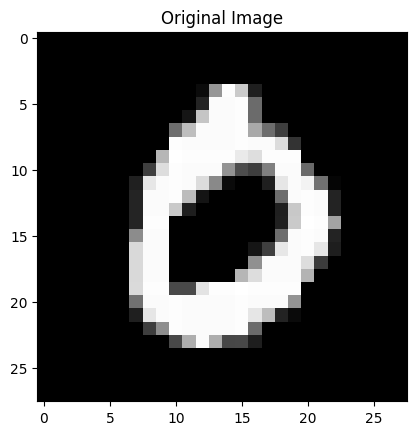

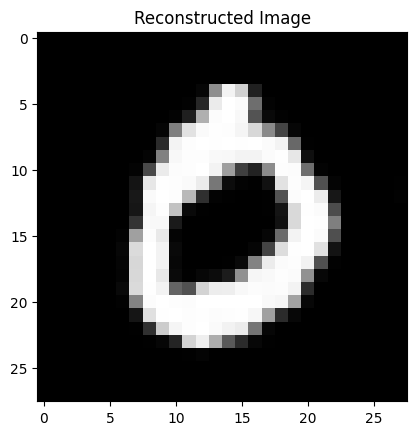

In [17]:
# Get a test image and move it to the same device
test_image = val_dataset[3][0].unsqueeze(0).to(config['device'])  # Add batch dim & move to correct device

# Run inference
with torch.no_grad():
    reconstruction, _ = model(test_image)

# Move reconstruction back to CPU for visualization
reconstruction = reconstruction.cpu().squeeze(0).squeeze(0)
test_image = test_image.cpu().squeeze(0).squeeze(0)


plt.imshow(test_image, cmap="gray")
plt.title("Original Image")
plt.show()

# Display the image
plt.imshow(reconstruction, cmap="gray")
plt.title("Reconstructed Image")
plt.show()

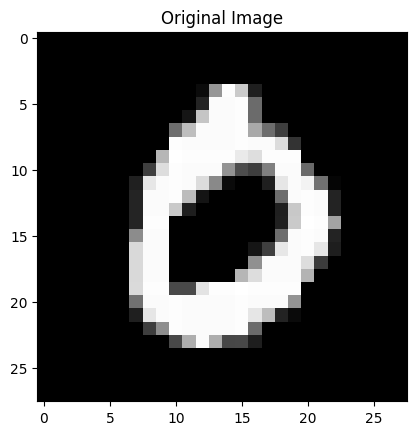

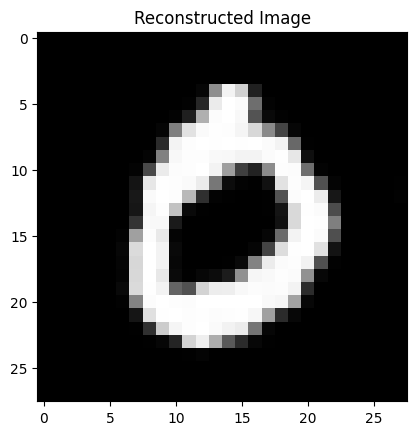

In [19]:
new_autoencoder = Autoencoder(
    input_shape=input_shape,
    channels=config['encoder_channels'],
    kernel_sizes=config['kernel_sizes'],
    strides=config['strides'],
    paddings=config['paddings'],
    latent_dim=config['latent_dim'],
    output_channels=input_shape[0]  # Typically 1 channel for MNIST.
)
new_autoencoder.to(config['device'])
new_autoencoder.load_state_dict(torch.load("autoencoder.pth"))
new_autoencoder.eval()

# Get a test image and move it to the same device
test_image = val_dataset[3][0].unsqueeze(0).to(config['device'])  # Add batch dim & move to correct device

# Run inference
with torch.no_grad():
    reconstruction, _ = new_autoencoder(test_image)

# Move reconstruction back to CPU for visualization
reconstruction = reconstruction.cpu().squeeze(0).squeeze(0)
test_image = test_image.cpu().squeeze(0).squeeze(0)


plt.imshow(test_image, cmap="gray")
plt.title("Original Image")
plt.show()

# Display the image
plt.imshow(reconstruction, cmap="gray")
plt.title("Reconstructed Image")
plt.show()

In [1]:
train_loader.shape

NameError: name 'train_loader' is not defined